In [ ]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import xgboost
from xgboost import XGBClassifier

In [ ]:
!ls

sample_data  t_ws_h_p_ts.xlsx


In [ ]:
df = pd.read_excel("t_ws_h_p_ts.xlsx")
df.head()

,T,WS,H,P,TS
0,37,11,33,1006,1
1,33,15,49,1006,1
2,36,17,33,1009,1
3,36,11,33,1010,1
4,41,11,27,1010,1


In [ ]:
target_col = 'TS'
X = df.loc[: ,df.columns !=target_col]
Y = df.loc[:, target_col]
print(X.head())

    T  WS   H     P
0  37  11  33  1006
1  33  15  49  1006
2  36  17  33  1009
3  36  11  33  1010
4  41  11  27  1010


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.33, random_state=0)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((450, 4), (222, 4), (450,), (222,))

In [ ]:
model = XGBClassifier(learning_rate=0.1,
                      max_depth=5,
                      n_estimators=500,
                      subsample=0.5,
                      colsample_bytree=0.5,
                      eval_metric='auc',
                      verbosit=1)
eval_set = [(X_valid,y_valid)]
model.fit(X_train, y_train,early_stopping_rounds=10,eval_set=eval_set,verbose=True)

[0]	validation_0-auc:0.587371
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.730257
[2]	validation_0-auc:0.731637
[3]	validation_0-auc:0.786787
[4]	validation_0-auc:0.788045
[5]	validation_0-auc:0.801599
[6]	validation_0-auc:0.819495
[7]	validation_0-auc:0.813489
[8]	validation_0-auc:0.805779
[9]	validation_0-auc:0.797176
[10]	validation_0-auc:0.792428
[11]	validation_0-auc:0.794457
[12]	validation_0-auc:0.797378
[13]	validation_0-auc:0.804886
[14]	validation_0-auc:0.812434
[15]	validation_0-auc:0.813733
[16]	validation_0-auc:0.81495
Stopping. Best iteration:
[6]	validation_0-auc:0.819495



XGBClassifier(colsample_bytree=0.5, eval_metric='auc', max_depth=5,
              n_estimators=500, subsample=0.5, verbosit=1)

In [ ]:
y_pred = model.predict(X_valid)
predictions = [round(value) for value in y_pred]

In [ ]:
print(f1_score(y_valid, predictions))

0.7246376811594203


In [ ]:
# evaluate predictions
print("accuracy")
print(accuracy_score(y_valid, predictions))

accuracy
0.7432432432432432


In [ ]:
confusion_matrix(y_valid,y_pred)

array([[90, 21],
       [36, 75]])

In [ ]:
tn,fp,fn,tp=confusion_matrix(y_valid,y_pred).ravel()
(tn,fp,fn,tp)

(90, 21, 36, 75)

In [ ]:
matrix=classification_report(y_valid,y_pred)
print('classification report : \n',matrix)

classification report : 
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       111
           1       0.78      0.68      0.72       111

    accuracy                           0.74       222
   macro avg       0.75      0.74      0.74       222
weighted avg       0.75      0.74      0.74       222



In [ ]:
print('Precision: %f' % precision_score(y_valid, y_pred))
print('Recall: %f' % recall_score(y_valid, y_pred))

Precision: 0.781250
Recall: 0.675676


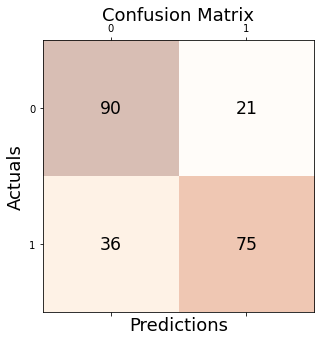

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_valid)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_valid,y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

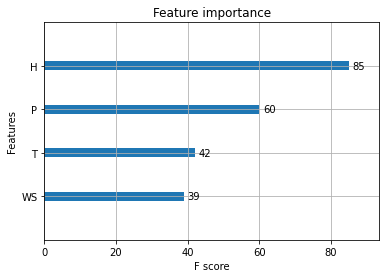

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()